In [1]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import matplotlib.pylab as plt

In [2]:
df=pd.read_csv('C:/Users/ACER\/Desktop//ty/clean_data.csv')

In [3]:
df.tail()

,Unnamed: 0,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,9563,17.10,49.69,1005.53,81.82,457.32
9564,9564,24.73,65.34,1015.42,52.80,446.92
9565,9565,30.44,56.24,1005.19,56.24,429.34
9566,9566,23.00,66.05,1020.61,80.29,421.57
9567,9567,17.75,49.25,1020.86,63.67,454.41


In [4]:
x=df.iloc[:,1:5]
y=df['energy_production']
y


0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9568, dtype: float64

In [5]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.30, random_state=31)

In [7]:
from sklearn.ensemble import RandomForestRegressor
r_f= RandomForestRegressor(n_estimators=102,
    min_samples_split=20,
    min_samples_leaf=28,
    max_features='auto')
r_f.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=28, min_samples_split=20,
                      n_estimators=102)

In [8]:
y_pred = r_f.predict(x_test)
y_pred

array([471.05547082, 434.13326846, 446.0983673 , ..., 438.80216099,
       466.9189869 , 467.69577608])

In [9]:
#making testing predictions
pred_test = r_f.predict(x_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 3.9571233332580844


In [10]:
#making trainingS predictions
pred_train = r_f.predict(x_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Root Mean Squared Error: 3.7955100603229335


In [11]:
print('R2 Score:', metrics.r2_score(y_test, pred_test))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

R2 Score: 0.9460586100937876
Mean Absolute Error: 3.0324849653783623
Mean Squared Error: 15.658825074615573
Root Mean Squared Error: 3.9571233332580844


Text(0, 0.5, 'Predictions')

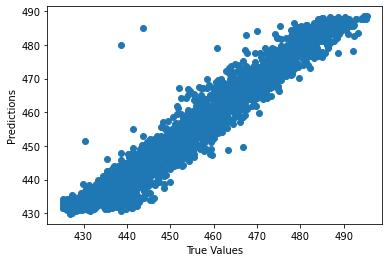

In [12]:
plt.scatter(y_test, pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
y_pred = r_f.predict([[15.14,49.64,1023.78,75]])
y_pred

array([432.6519605])